# Assignment 1, Spotify Songs Album



This dataset provides information about music tracks and their performance across various platforms. It includes essential information like track name, artist(s), release date, and presence in popular playlists and charts on platforms like Spotify, Apple Music, Deezer, and Shazam. Additionally, it features metrics such as BPM, key, mode, danceability, valence, energy, acousticness, instrumentalness, and liveness_speechiness, which offer insights into the musical characteristics and appeal of each track.

Source: https://www.kaggle.com/datasets/zeesolver/spotfy/data

# Dataset Glossary for the Columns



*   track_name: The name of the track.

*   artist(s)_name: The name(s) of the artist(s) who created the track.

*   artist_count: The number of artists associated with the track.

*   released_year: The year when the track was released.

*   released_month: The month when the track was released.

*   released_day: The day when the track was released.

*   in_spotify_playlists: Indicates whether the track is included in Spotify playlists.

*   in_spotify_charts: Indicates whether the track is present in Spotify charts.

*   streams: The total number of streams the track has accumulated.

*   in_apple_playlists: Indicates whether the track is included in Apple Music playlists.

*   in_apple_charts: Indicates whether the track is present in Apple Music charts.

*   in_deezer_playlists: Indicates whether the track is included in Deezer playlists.

*   in_deezer_charts: Indicates whether the track is present in Deezer charts.

*   in_shazam_charts: Indicates whether the track is present in Shazam charts.

*   bpm: Beats per minute - a measure of tempo in music.

*   key: The musical key in which the track is composed.

*   mode: Indicates whether the track is in a major or minor key.

*   danceability_: A measure of how suitable a track is for dancing.

*   valence_: The musical positiveness conveyed by a track.

*   energy_: The perceived energy of a track.

*   acousticness_: A measure of how acoustic a track is.

*   instrumentalness_: A measure of whether a track contains vocals.

*   liveness_: A measure of presence of live elements or spoken words in a track.

*   speechiness_: Indicates the presence of live performance elements or spoken words in the song.














# Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from collections import Counter


sns.color_palette("crest", as_cmap=True)
sns.set_palette("crest")

# Load the Spotify Dataset

In [27]:
df = pd.read_csv('/content/Data/Popular_Spotify_Songs.csv', encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Data Set Size

In [28]:
df.shape

(953, 24)

With this dataset there are 953 unique values.

# Null Values

In [29]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

This will show us which features have unknown or missing values.

# Convert Columns to Numeric Values and Recheck Null Values

In [30]:
df['in_shazam_charts'].fillna(0, inplace=True)
df['key'].fillna('Unknown', inplace=True)

print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


Filling in unknown or missing values will hekp with the data visualization in later step. After fillingin the values we can check and see if there are still any more null values.

# Convert Values to Numeric

In [31]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

Doing this wil convert all non-numeric values with NaN.

# Recheck Null Values

In [32]:
print(df.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts         7
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


After converting selected columns to numeric valuse we can see that there are som enull values.

# Drop Rows That Have Null Values

In [33]:
df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'], inplace=True)

Dropping rows that have null values will remove data points that do not have all of the features listed.

# Last Null Value Check

In [34]:
print(df.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


The last check to make sure that only complete data points are being used.

# Replace Infinite Values with NaN and Drop Them

In [35]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

Replacing infinite values with NaN can help fix outliers.

# Intitial Data Analysis

In [36]:
# Display the first few rows of the DataFrame
print("\nHead of the DataFrame:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display info
print("\nDataFrame Info:")
print(df.info())

# Additional statistics
print("\nAdditional Statistics:")
print("Mean:\n", df.mean(numeric_only=True), "\n")
print("Median:\n", df.median(numeric_only=True), "\n")
print("Mode:\n", df.mode(numeric_only=True).iloc[0], "\n")
print("Standard Deviation:\n", df.std(numeric_only=True), "\n")
print("Variance:\n", df.var(numeric_only=True), "\n")
print("Skewness:\n", df.skew(numeric_only=True), "\n")
print("Kurtosis:\n", df.kurtosis(numeric_only=True), "\n")


Head of the DataFrame:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm  key   mode  \
0                14

This initial data analysis can give some initial stastics. The head is displaying the first 5 rows and all 24 columns. Next we have a summary of the stastics that includes the count of each category, the mean, the standard deviation, the min vlaue, the max value and other benchmark values. Then we have the dataframe informaation. Here you can see the total number of entries, the number of coluns, the name of the columns, the count of not null values and the object types. You can also see the memory usage. Lastly there are some additional statistics on numerical values only. You can see the mean, median, mode, standard deviation, variance, skewness and kurtosis on colums with numerical values, and compare values.

# Show the Plot Distributions For Numerical Features

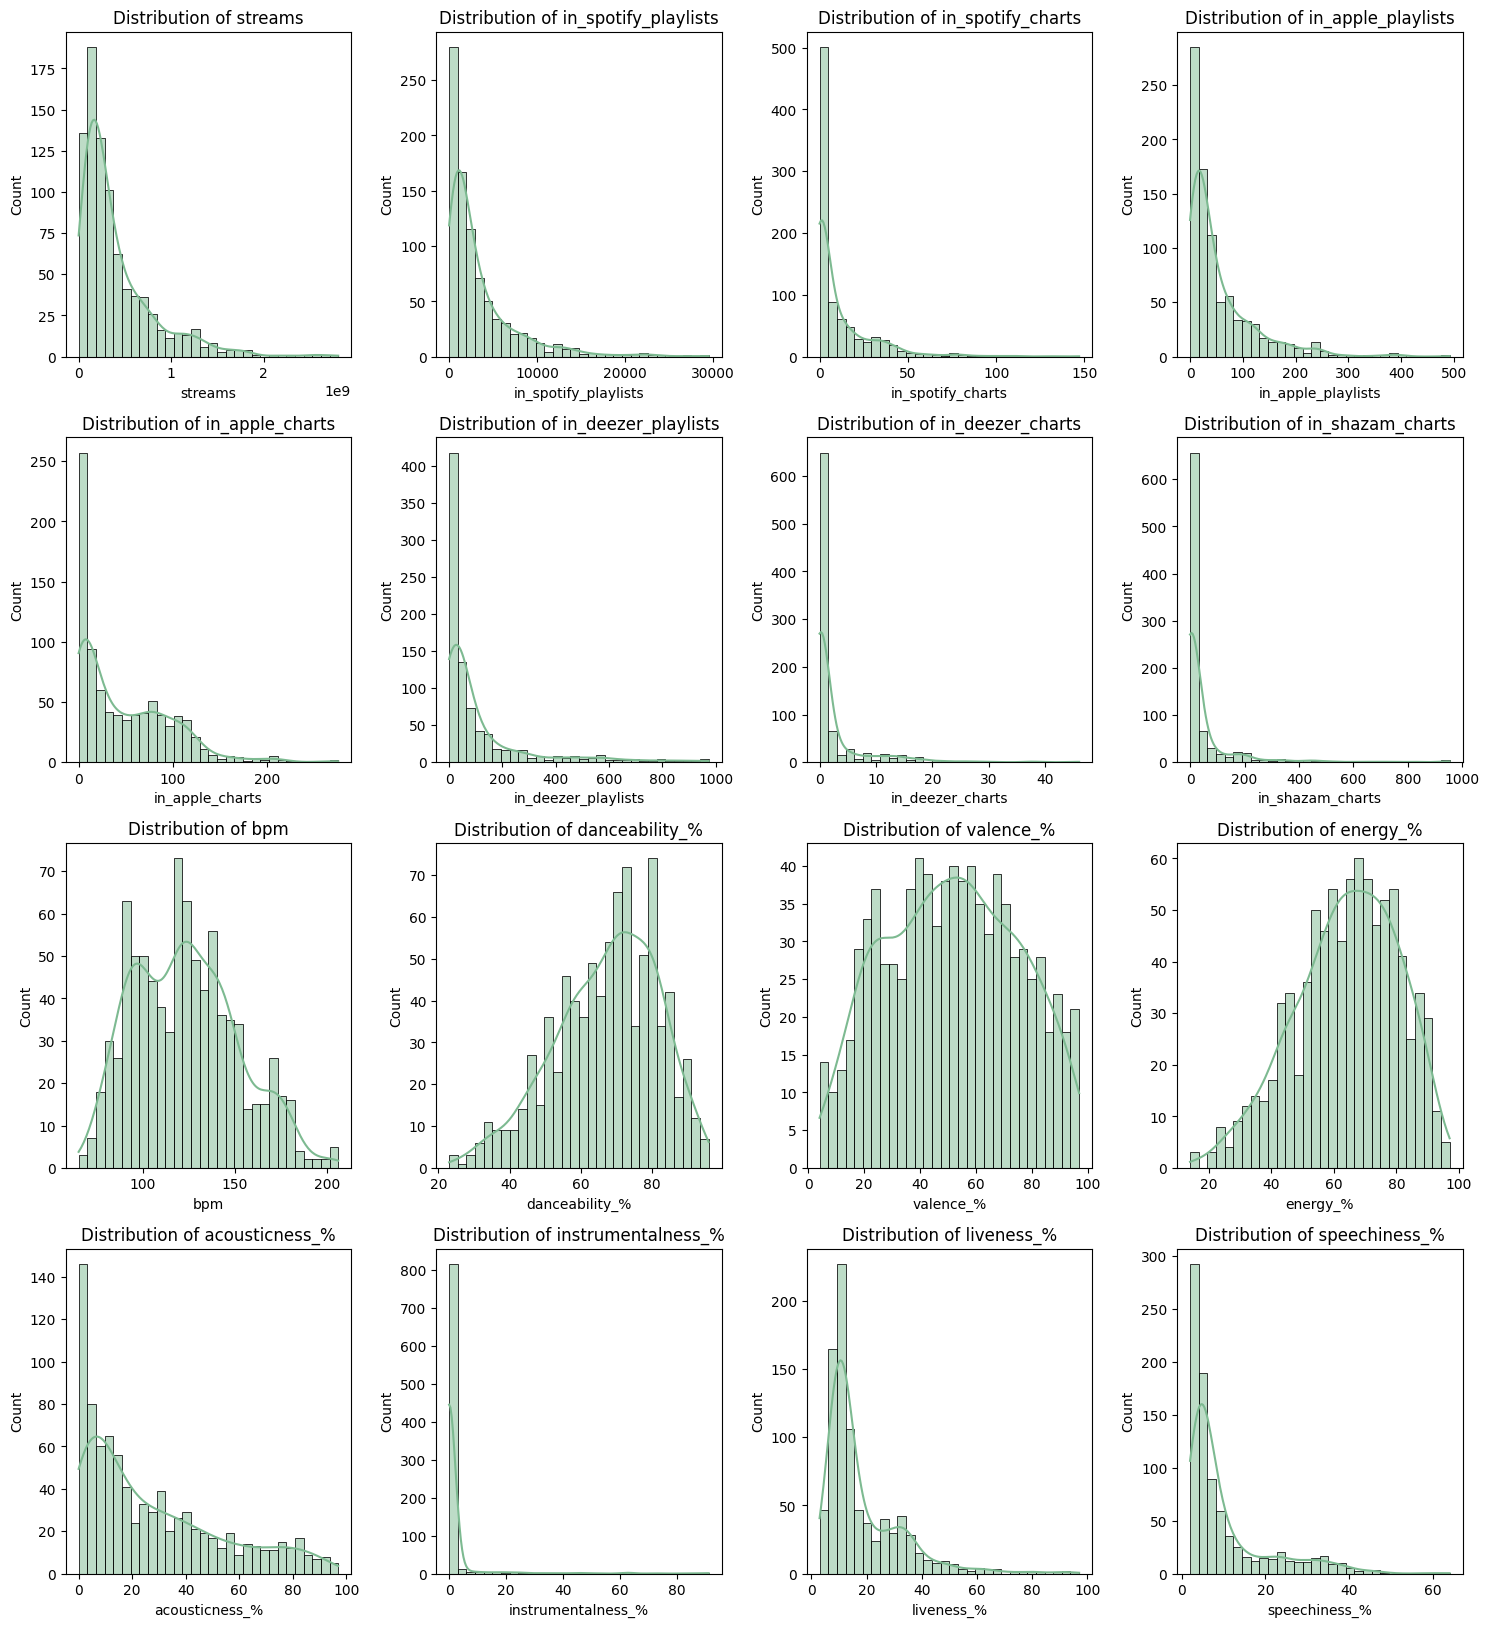

In [37]:
numerical_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                     'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%',
                     'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']



plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Here you can see the distributions of each category and the bell curve that most fits the data.

# Show the Plot Counts for Categorical Features

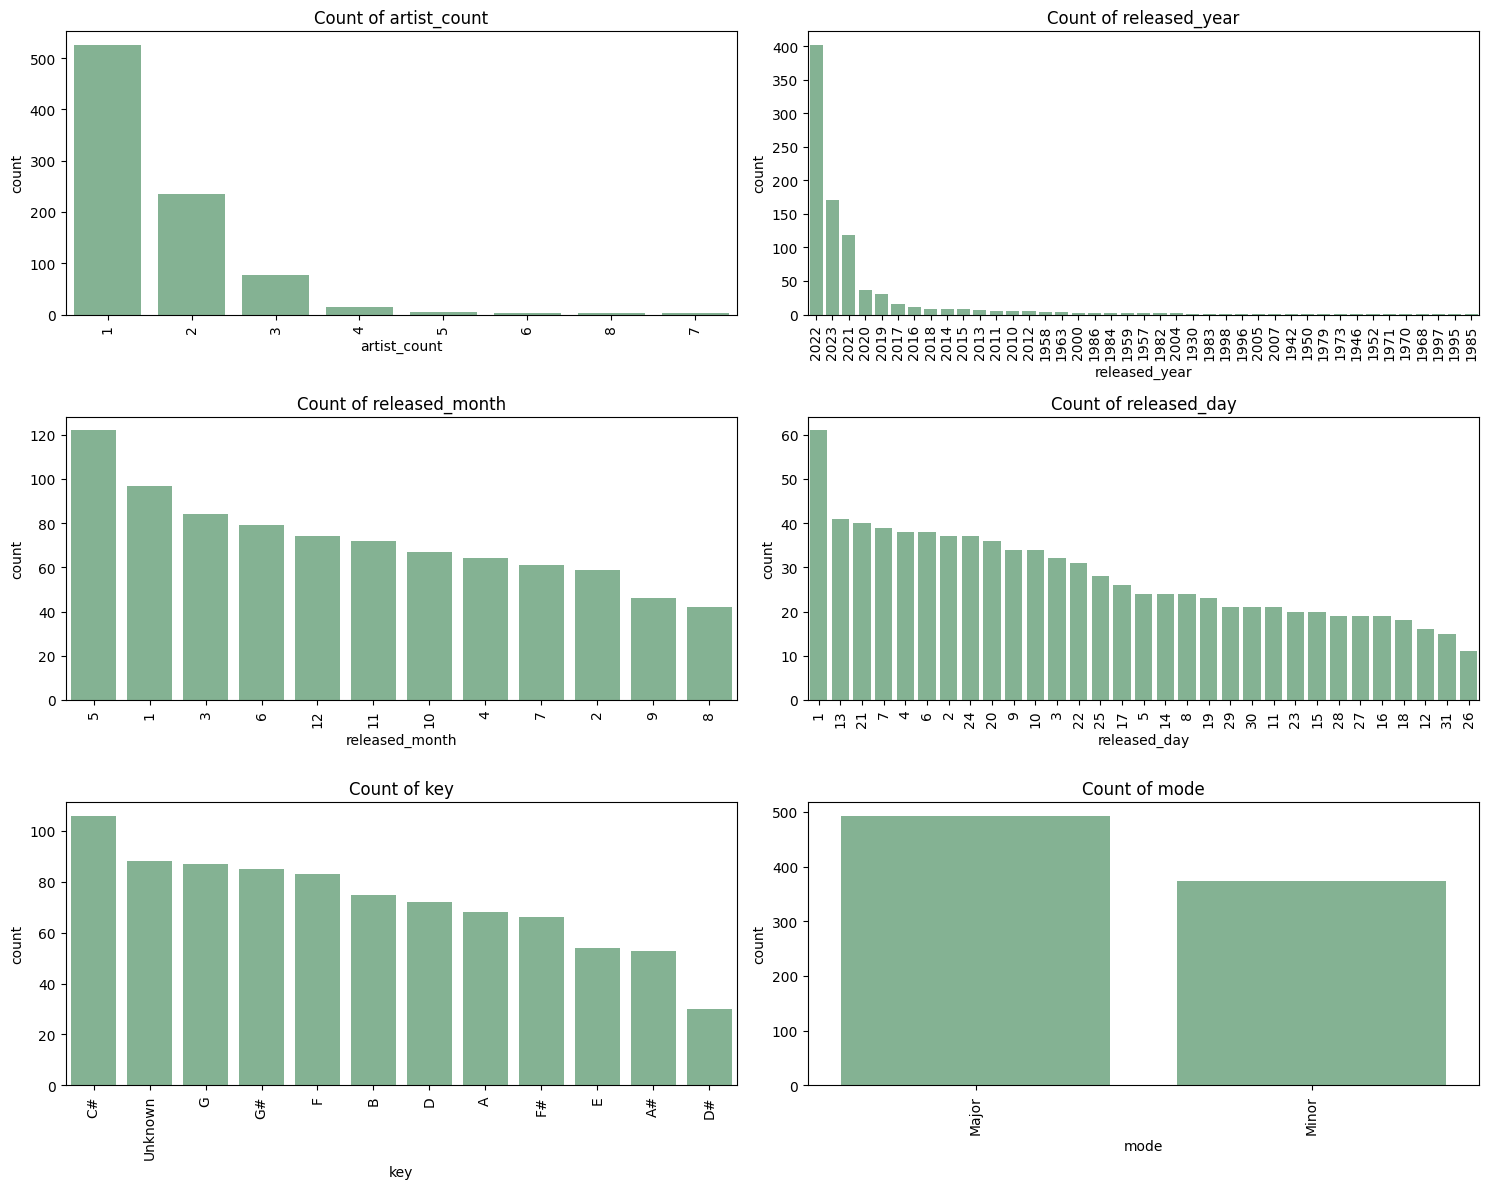

In [38]:
categorical_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'key', 'mode']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Here you can see the count of some of the song features.

# Filter DataFrame by Numerical Columns and Plot the Heatmap

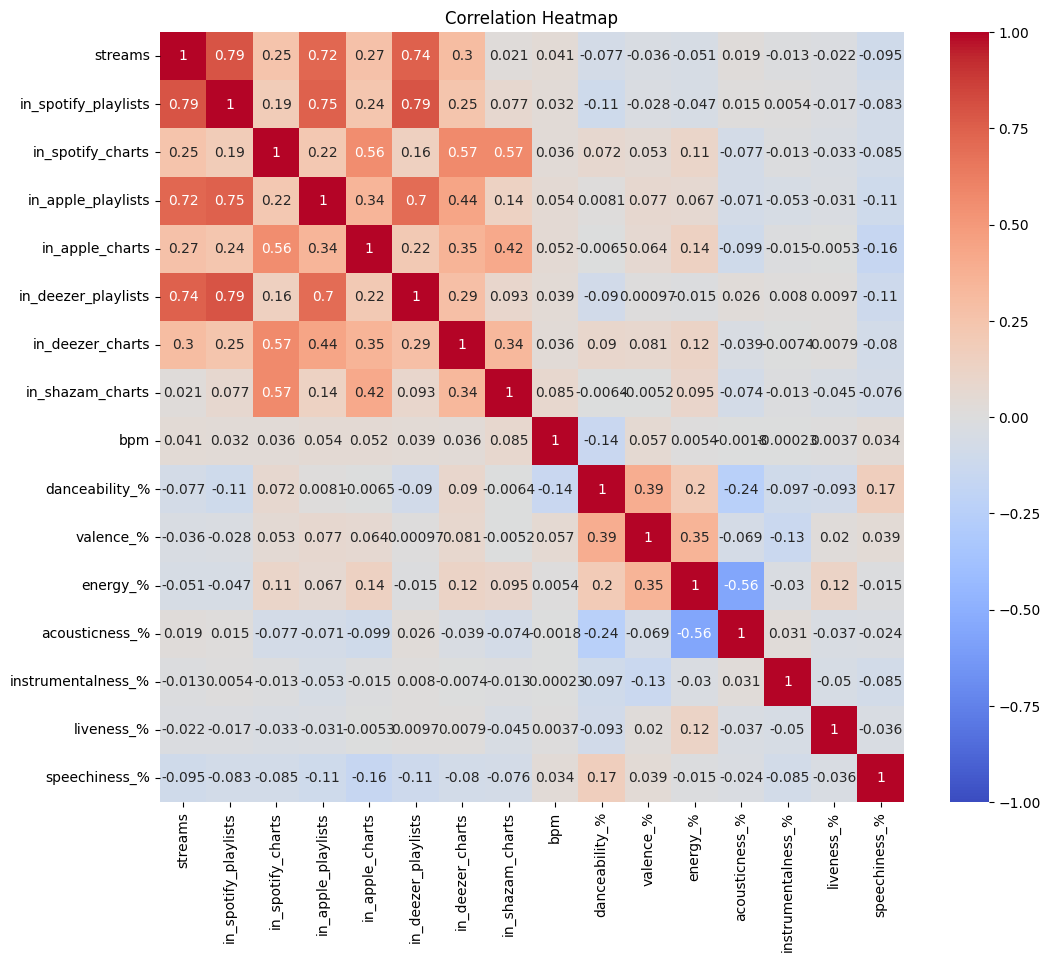

In [39]:
numeric_df = df[numerical_columns]

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The heatmap details how all of the categories relate to each other. By having a deeper red color the two categories are closely related such as streams and in_spotify_playlists with a score of 0.79. Categories that are not very related will have a deeper blue color such as acousticness and energy with a -0.56 score.

# Cluster Features and Show Scatter Plots for Feature Relationships to Streams

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


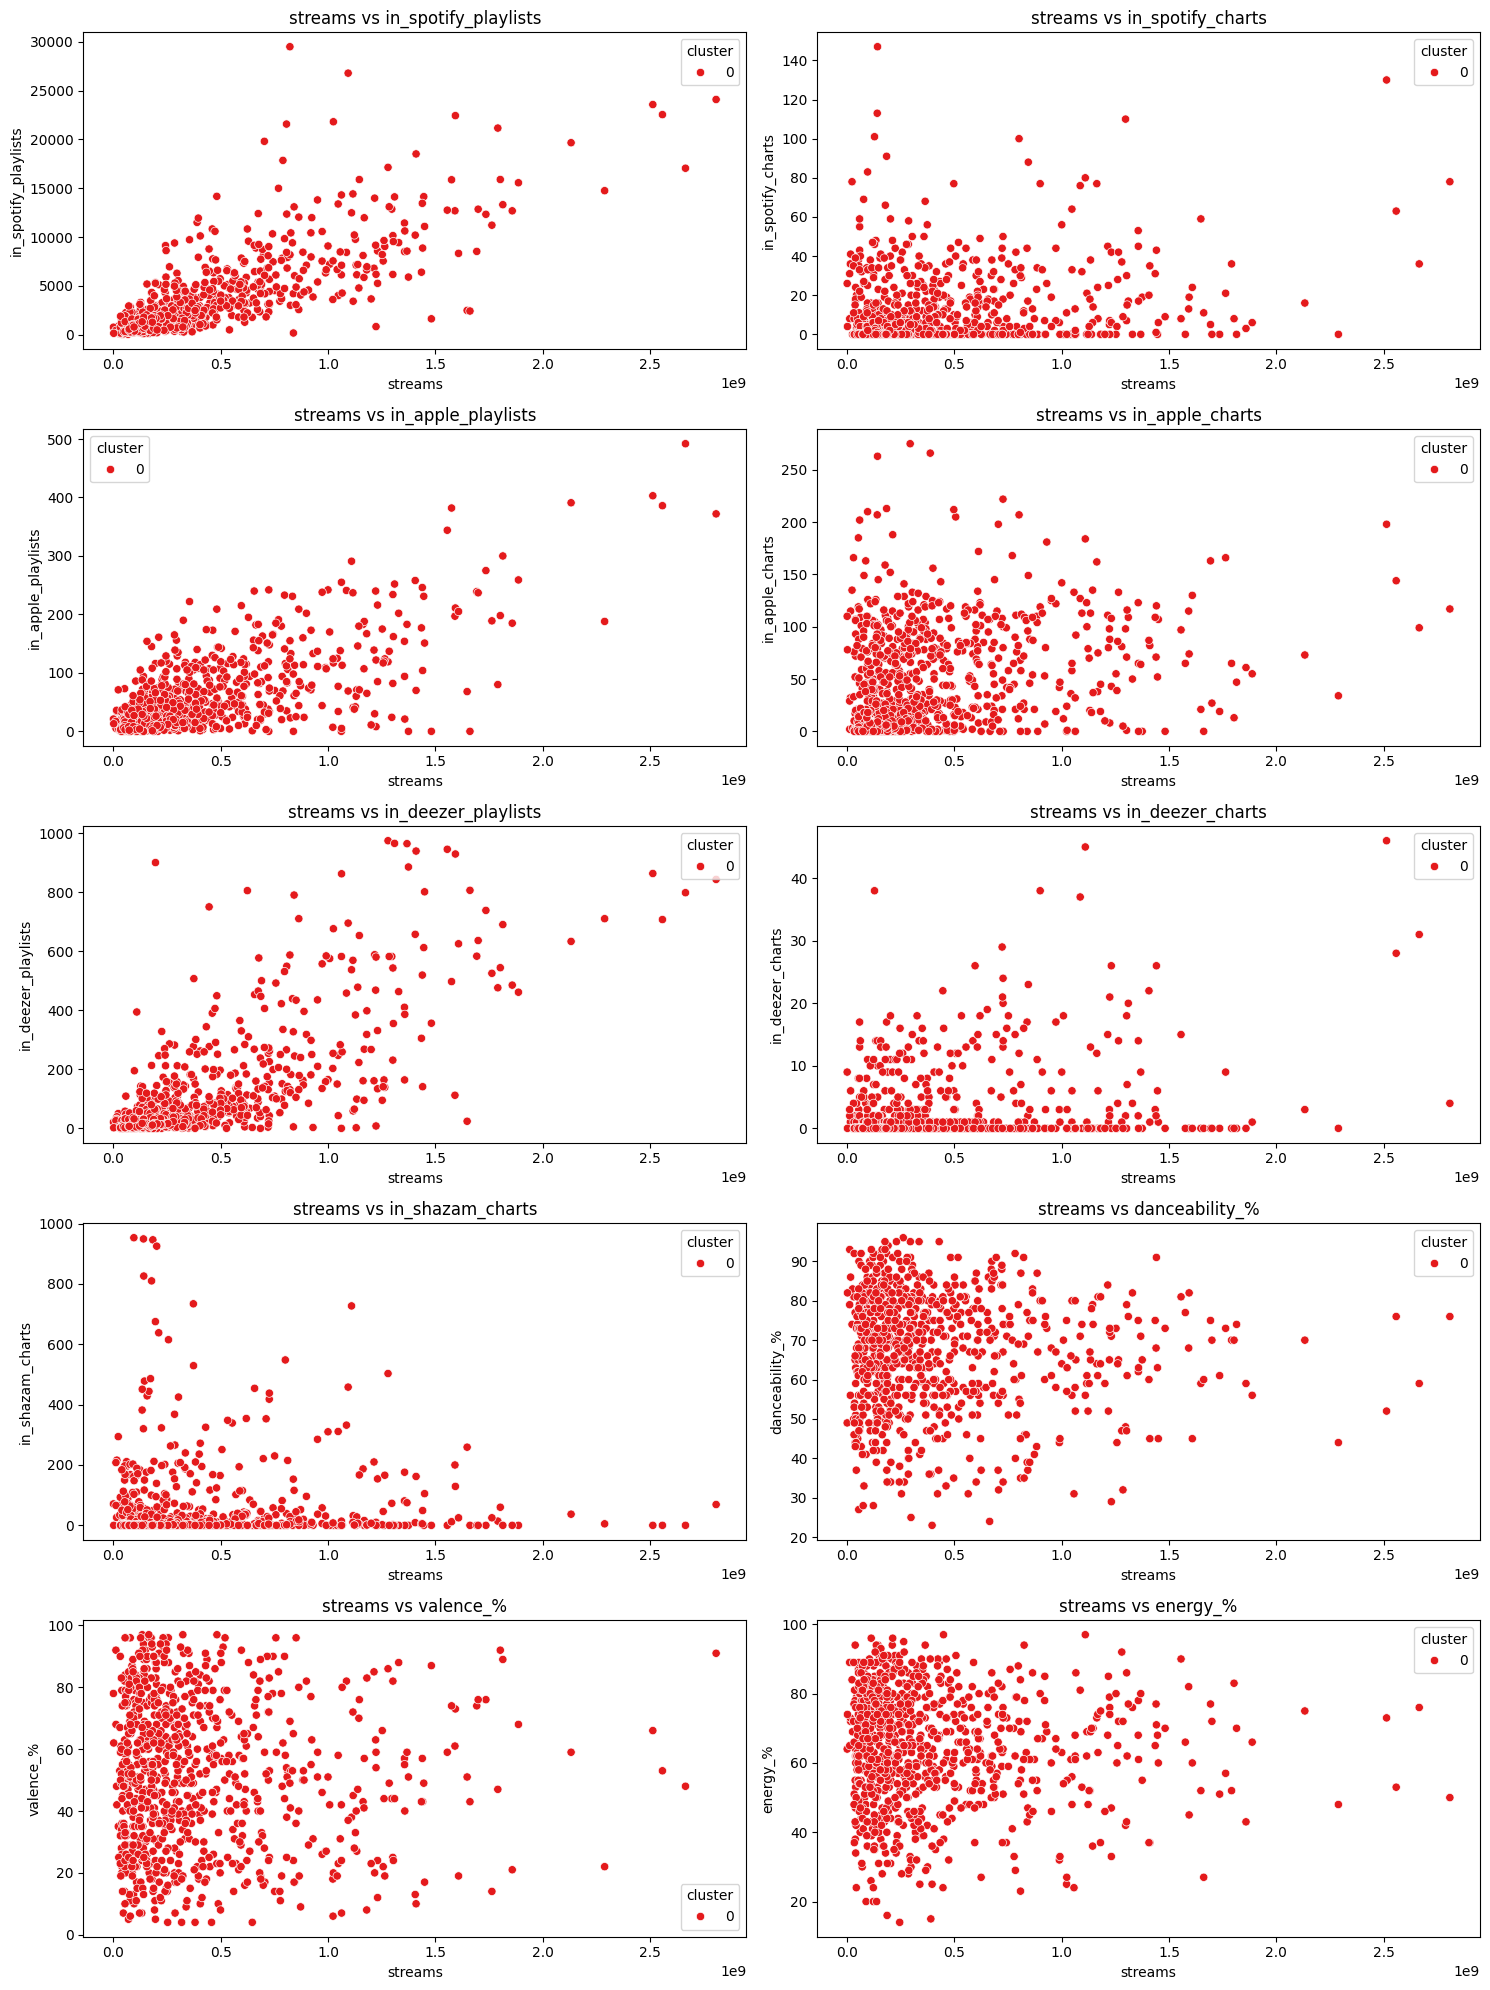

In [40]:
# Features for clustering
features_for_clustering = ['streams', 'in_spotify_playlists', 'in_spotify_charts',
                           'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                           'in_deezer_charts', 'in_shazam_charts', 'danceability_%',
                           'valence_%', 'energy_%']

# Scatter plots for relationships between features
relationships = [
    ('streams', 'in_spotify_playlists'),
    ('streams', 'in_spotify_charts'),
    ('streams', 'in_apple_playlists'),
    ('streams', 'in_apple_charts'),
    ('streams', 'in_deezer_playlists'),
    ('streams', 'in_deezer_charts'),
    ('streams', 'in_shazam_charts'),
    ('streams', 'danceability_%'),
    ('streams', 'valence_%'),
    ('streams', 'energy_%')
]

# Clustering
kmeans = KMeans(n_clusters=1)
df['cluster'] = kmeans.fit_predict(df[features_for_clustering])

# Plotting
plt.figure(figsize=(15, 20))
for i, (x, y) in enumerate(relationships, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=x, y=y, hue='cluster', palette='Set1')
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

I decided to cluster and show scatter plots for how features relate to  the number of streams.

Find the 10 Most Streamed Artists

Top 10 Most Streamed Artists:
     artist(s)_name       streams
522    Taylor Swift  1.293982e+10
40        Bad Bunny  9.997800e+09
206    Harry Styles  9.286066e+09
532      The Weeknd  8.534286e+09
403  Olivia Rodrigo  7.442149e+09
129        Doja Cat  4.702295e+09
465             SZA  4.557811e+09
35              BTS  4.389892e+09
71       Bruno Mars  4.205494e+09
149      Ed Sheeran  3.269640e+09


<ipython-input-41-2d2ee039afb6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist(s)_name', y='streams', data=top_10_artists,palette = "crest")


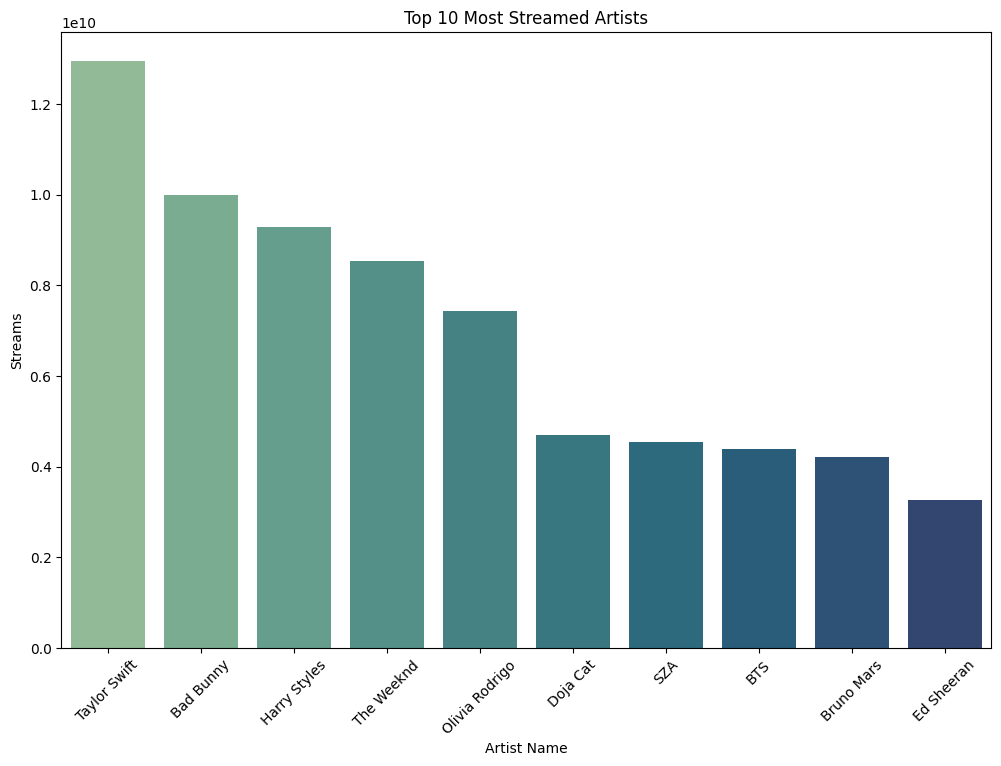

In [41]:
# Group by artist name and sum streams
artist_streams = df.groupby('artist(s)_name')['streams'].sum().reset_index()

# Sort by streams to find top 10 artists
top_10_artists = artist_streams.sort_values(by='streams', ascending=False).head(10)

print("Top 10 Most Streamed Artists:")
print(top_10_artists)



plt.figure(figsize=(12, 8))
sns.barplot(x='artist(s)_name', y='streams', data=top_10_artists,palette = "crest")
plt.xlabel('Artist Name')
plt.xticks(rotation=45)
plt.ylabel('Streams')
plt.title("Top 10 Most Streamed Artists")
plt.show()

Here we can see that Taylor swift was the most streamed artist with 1.293982e+10 streams and Ed Sheeran was the tenth most streamed artist with 3.269640e+09 streams.

# Number of Song Released by the Top 10 Most Streamed Artists

Top 10 Most Streamed Artists with Number of Songs Released:
   artist(s)_name       streams  num_songs
0    Taylor Swift  1.293982e+10         33
1       Bad Bunny  9.997800e+09         19
2    Harry Styles  9.286066e+09         16
3      The Weeknd  8.534286e+09         20
4  Olivia Rodrigo  7.442149e+09          7
5        Doja Cat  4.702295e+09          6
6             SZA  4.557811e+09         19
7             BTS  4.389892e+09          8
8      Bruno Mars  4.205494e+09          3
9      Ed Sheeran  3.269640e+09          5


<ipython-input-42-f0036e2b94ff>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='artist(s)_name', y='num_songs', data=top_10_artists_with_song_counts, ax=ax1, palette = "crest")


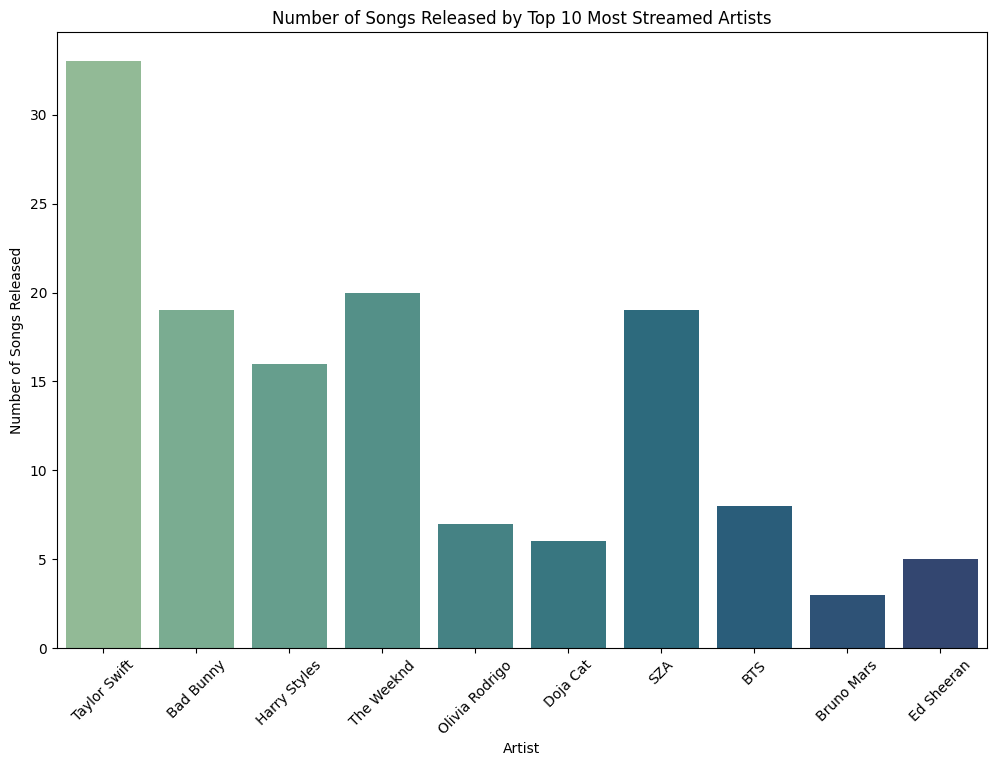

In [42]:
# Filter original DataFrame to include only top 10 artists
top_10_artist_names = top_10_artists['artist(s)_name'].tolist()
top_10_songs = df[df['artist(s)_name'].isin(top_10_artist_names)]

# Count the number of songs released by each of the top 10 artists
artist_song_counts = top_10_songs['artist(s)_name'].value_counts().reset_index()
artist_song_counts.columns = ['artist(s)_name', 'num_songs']

# Merge the song counts with the top 10 artists DataFrame
top_10_artists_with_song_counts = top_10_artists.merge(artist_song_counts, on='artist(s)_name')

print("Top 10 Most Streamed Artists with Number of Songs Released:")
print(top_10_artists_with_song_counts)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the number of songs released
sns.barplot(x='artist(s)_name', y='num_songs', data=top_10_artists_with_song_counts, ax=ax1, palette = "crest")
ax1.set_xlabel('Artist')
plt.xticks(rotation=45)
ax1.set_ylabel('Number of Songs Released')
ax1.set_title("Number of Songs Released by Top 10 Most Streamed Artists")

plt.show()

Here you can see that from the data Taylor Swift, the number one artist, has released 33 songs and Ed Sheeran, the artist in tenth place, has released 5 songs, that is two more songs than Bruno Mars who has only 3 songs in this data but is in ninth place for most streams.

# Top 10 Most Streamed Artists From 2018 - 2023

Top Streamed Artists in Recent Years (> 2018):
     artist(s)_name       streams
35        Bad Bunny  9.997800e+09
173    Harry Styles  9.286066e+09
456    Taylor Swift  8.608154e+09
355  Olivia Rodrigo  7.442149e+09
460      The Weeknd  4.751820e+09
104        Doja Cat  4.702295e+09
407             SZA  4.557811e+09
31              BTS  4.389892e+09
123      Ed Sheeran  3.269640e+09
272       Lil Nas X  2.988745e+09


<ipython-input-43-25e4e5ed4919>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streamed_artists['artist(s)_name'], y=top_streamed_artists['streams'], palette = "crest")


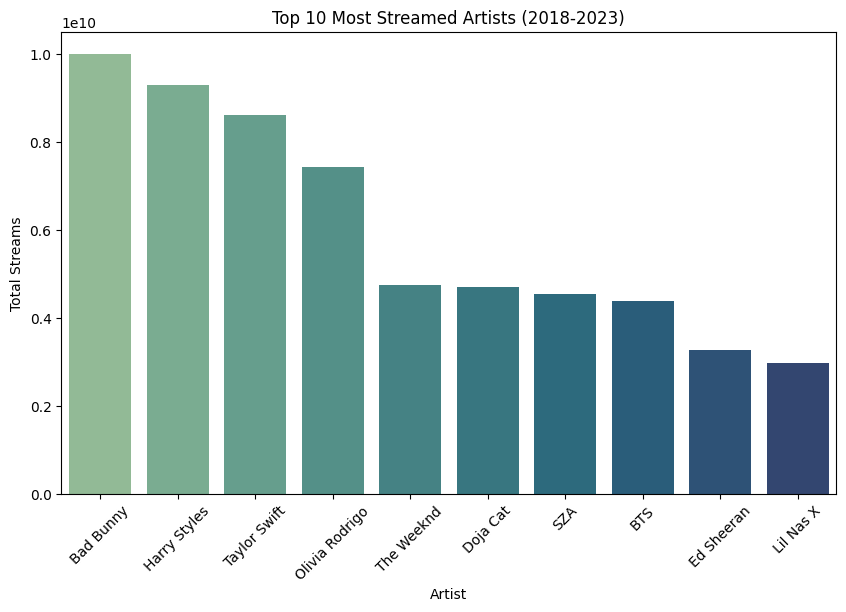

In [43]:
# Filter data for recent years
recent_years = df[df['released_year'] > 2018]

# Count streams for each artist
artist_streams = recent_years.groupby('artist(s)_name')['streams'].sum().reset_index()

# Find top streamed artists
top_streamed_artists = artist_streams.sort_values(by='streams', ascending=False).head(10)

print("Top Streamed Artists in Recent Years (> 2018):")
print(top_streamed_artists)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_streamed_artists['artist(s)_name'], y=top_streamed_artists['streams'], palette = "crest")
plt.title('Top 10 Most Streamed Artists (2018-2023)')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.xticks(rotation=45)
plt.show()

In this graph wee can see the top 10 most stream artist from 2018-2023. In these rataing Taylor Swift is third to Bad Bunny who has 9.997800e+09 streams compared to Taylor Swift's 8.608154e+09 streams. we can also see that Bruno Mars is no longer on this list, instead Ed Sheeran has taken his place and Lil Nas X is now the tenth most streamed artist with 2.988745e+09 streams.

# Number of Songs Released by Top Streamed Artists from 2018 - 2023

Top Streamed Artists in Recent Years with Number of Songs Released:
   artist(s)_name       streams  num_songs
0       Bad Bunny  9.997800e+09         19
1    Harry Styles  9.286066e+09         16
2    Taylor Swift  8.608154e+09         28
3  Olivia Rodrigo  7.442149e+09          7
4      The Weeknd  4.751820e+09         17
5        Doja Cat  4.702295e+09          6
6             SZA  4.557811e+09         19
7             BTS  4.389892e+09          8
8      Ed Sheeran  3.269640e+09          5
9       Lil Nas X  2.988745e+09          3


<ipython-input-45-f49216018f49>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_songs', y='artist(s)_name', data=top_streamed_artists_with_song_counts, palette = "crest")


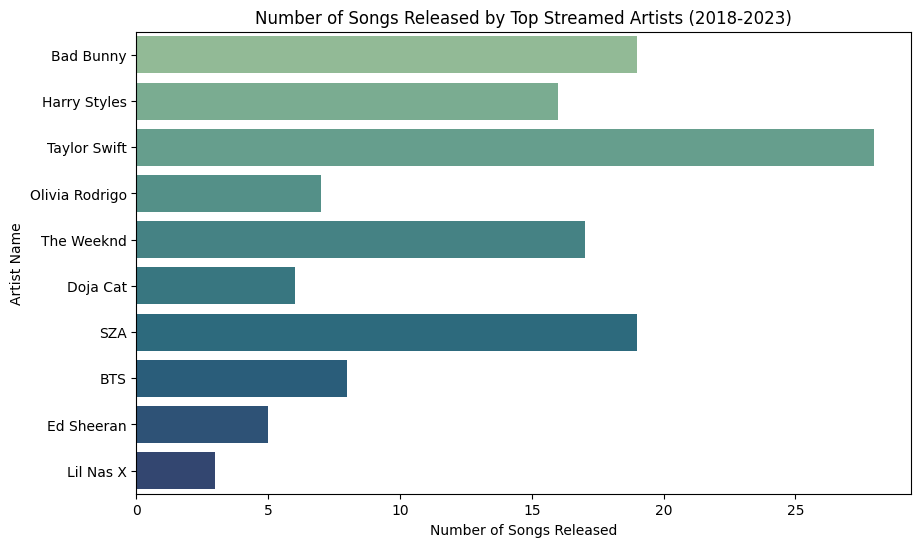

In [45]:
# Filter original DataFrame to include only top streamed artists in recent years
top_streamed_artist_names = top_streamed_artists['artist(s)_name'].tolist()
top_streamed_songs = recent_years[recent_years['artist(s)_name'].isin(top_streamed_artist_names)]

# Calculate the number of songs released by each of the top streamed artists in recent years
artist_song_counts = top_streamed_songs['artist(s)_name'].value_counts().reset_index()
artist_song_counts.columns = ['artist(s)_name', 'num_songs']

# Merge the song counts with the top streamed artists DataFrame
top_streamed_artists_with_song_counts = top_streamed_artists.merge(artist_song_counts, on='artist(s)_name')

print("Top Streamed Artists in Recent Years with Number of Songs Released:")
print(top_streamed_artists_with_song_counts)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='num_songs', y='artist(s)_name', data=top_streamed_artists_with_song_counts, palette = "crest")
plt.xlabel('Number of Songs Released')
plt.ylabel('Artist Name')
plt.title('Number of Songs Released by Top Streamed Artists (2018-2023)')
plt.show()

Here we can see the number of songs that the top artits from  2018-2023 released. while taylor Swift was third in most streams she releassed the most music with 28 songs, while Bad Bunny released 19 songs. Ed Sheeran released 5 songs and Lil Nas X released 3 songs.

# Top 30 Most Streamed Songs

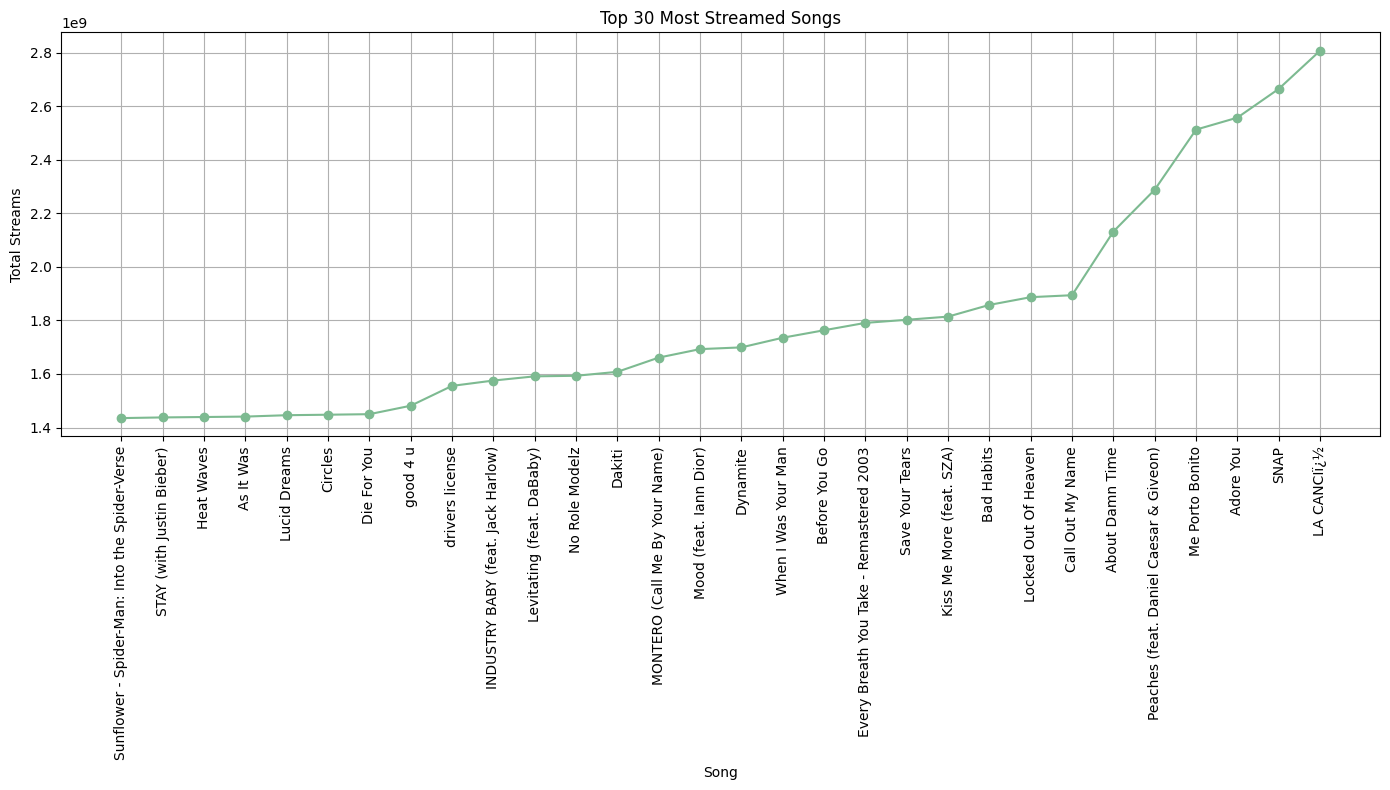

In [46]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

top_songs = df.groupby('track_name')['streams'].sum().nlargest(30)

plt.figure(figsize=(14, 8))
top_songs.sort_values().plot(kind='line', marker='o')
plt.title('Top 30 Most Streamed Songs')
plt.xlabel('Song')
plt.ylabel('Total Streams')
plt.xticks(range(len(top_songs)), top_songs.index, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

The top song was LA CANCIÓN by J Balvin, Bad Bunny and the bottom song was Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee. Here we can also see that there was an error in the data with th ename of the song being messed up due to the "Ó" character in LA CANCIÓN.

# Most Streamed Songh By Month

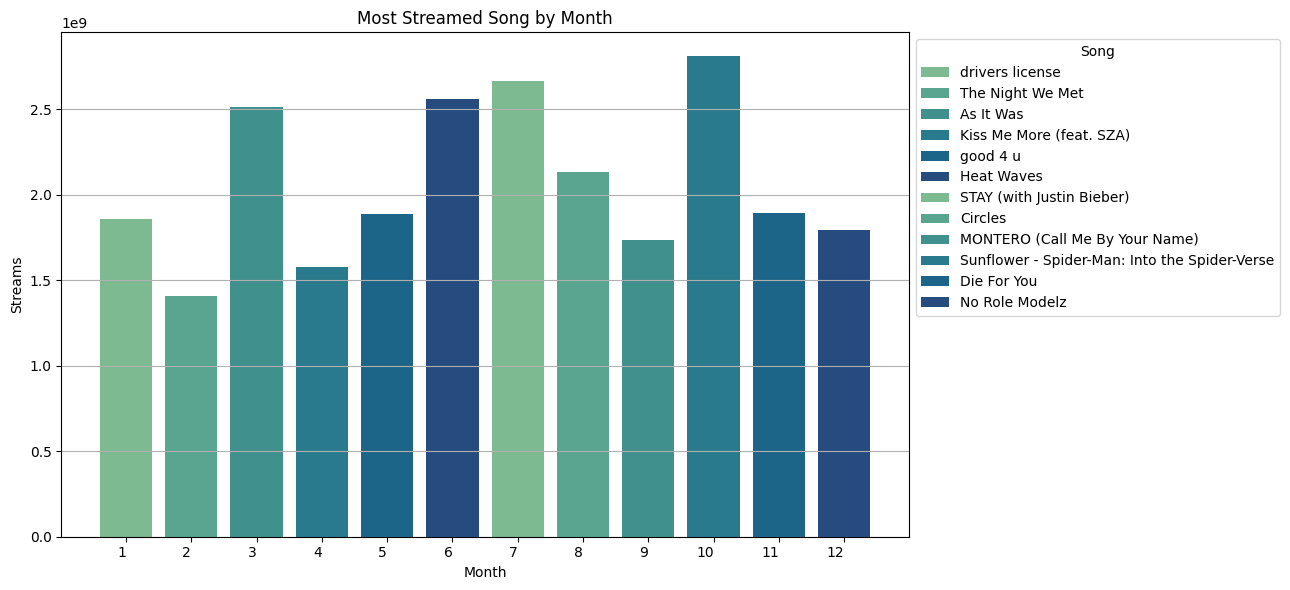

In [47]:
most_streamed_song_monthly = df.groupby(['released_month', 'track_name'])['streams'].sum().reset_index()
most_streamed_song_monthly = most_streamed_song_monthly.loc[most_streamed_song_monthly.groupby('released_month')['streams'].idxmax()]

plt.figure(figsize=(13, 6))
for month in most_streamed_song_monthly['released_month'].unique():
    data = most_streamed_song_monthly[most_streamed_song_monthly['released_month'] == month]
    plt.bar(data['released_month'], data['streams'], label=data['track_name'].iloc[0])

plt.title('Most Streamed Song by Month')
plt.xlabel('Month')
plt.ylabel('Streams')
plt.legend(title='Song', bbox_to_anchor=(1, 1))
plt.xticks( [1,2,3,4,5,6,7,8,9,10,11,12],  ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Here we can see the most streamed song by month, overall Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee, had not only the highest number of streams in october but the highest streams of any month.

# Boxplots

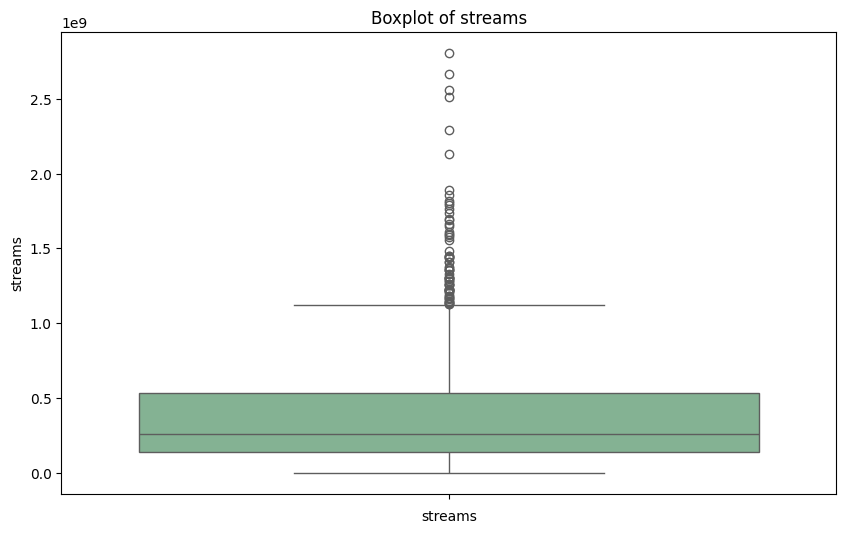

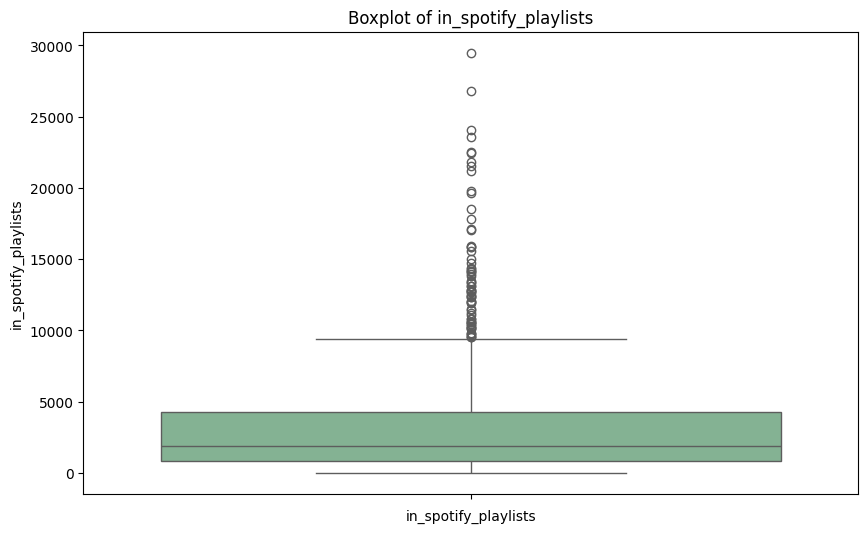

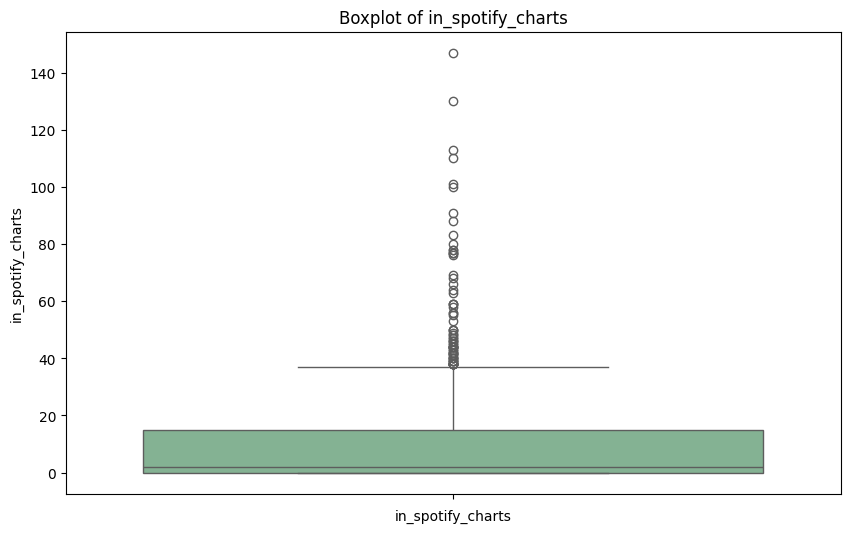

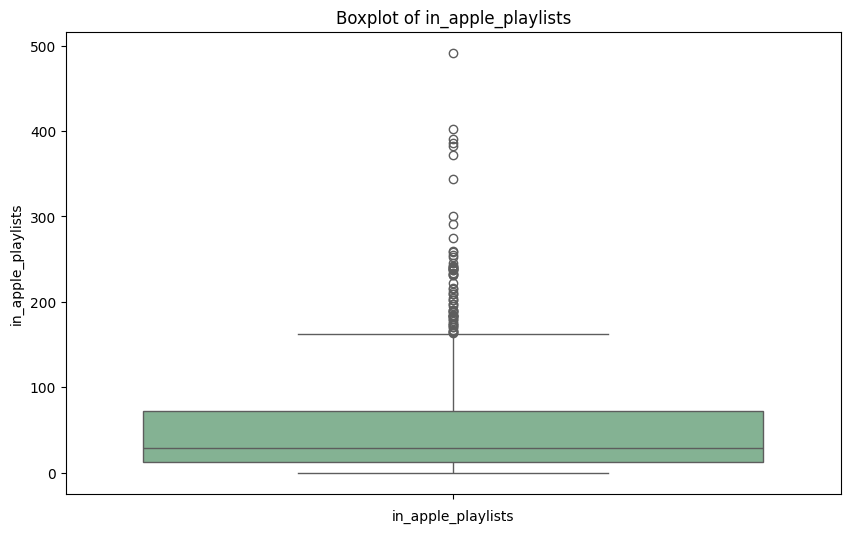

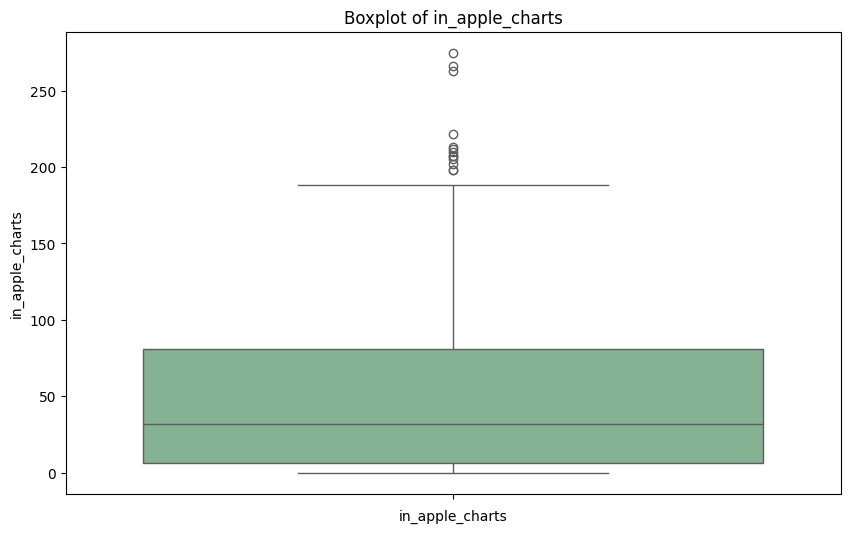

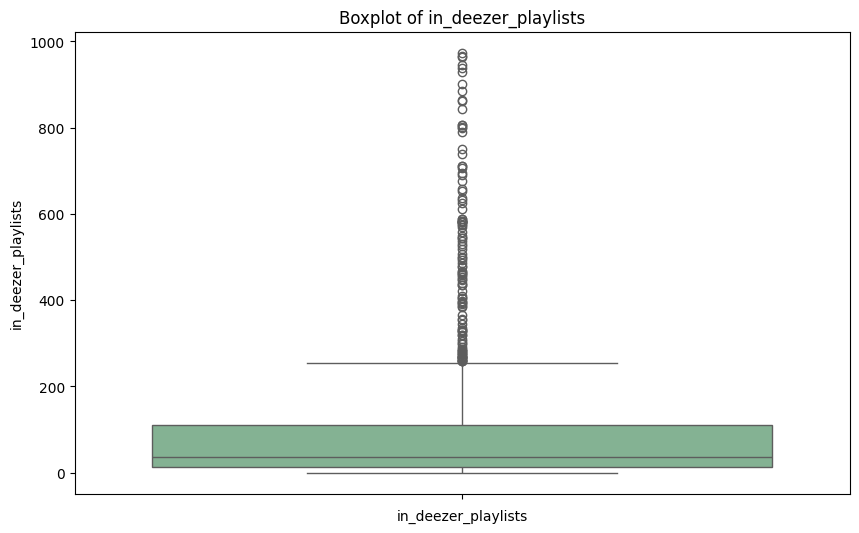

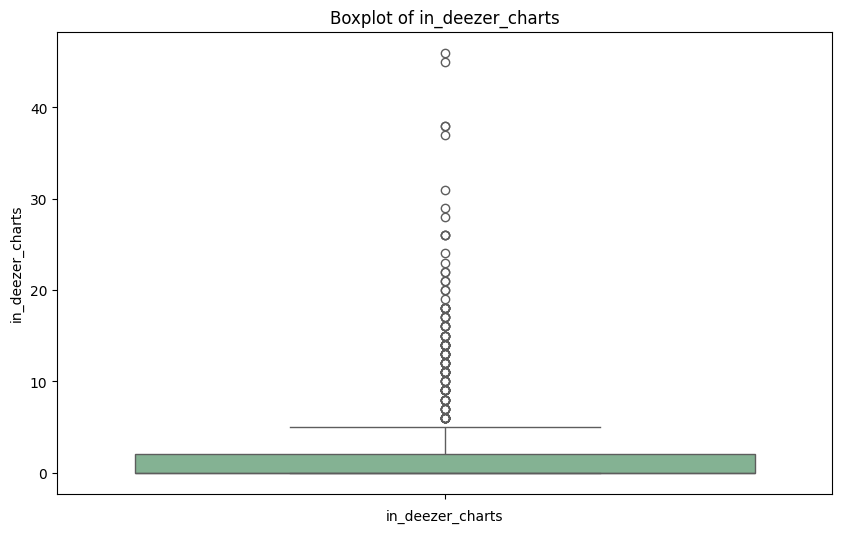

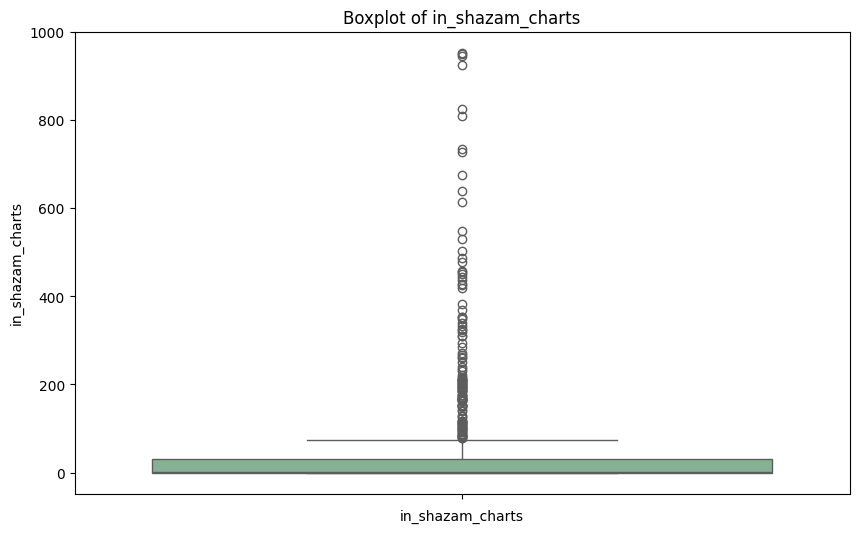

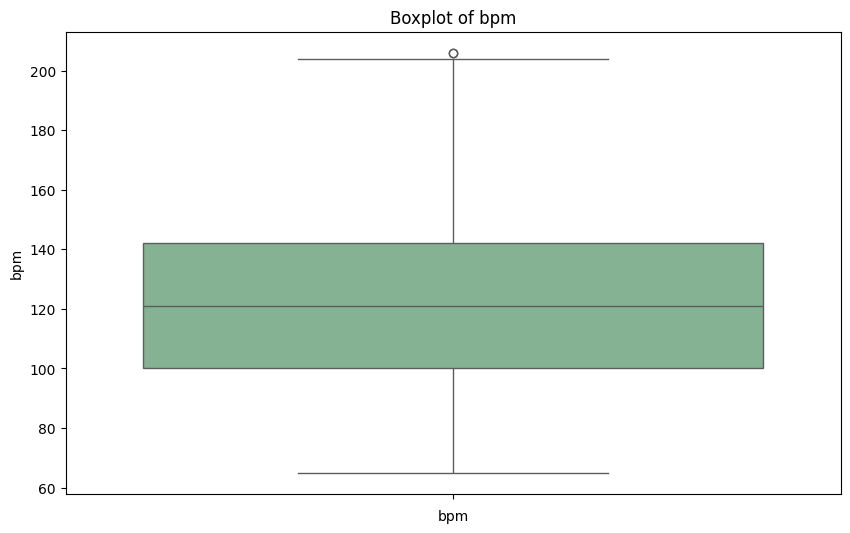

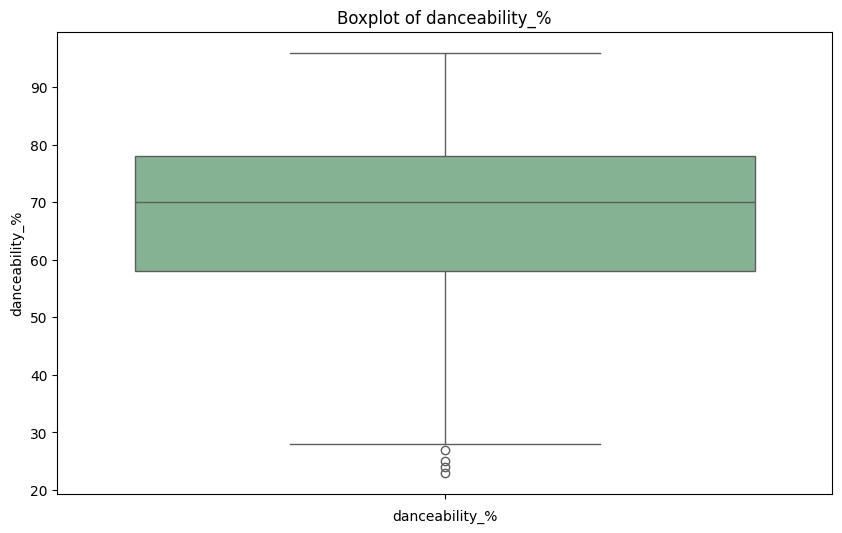

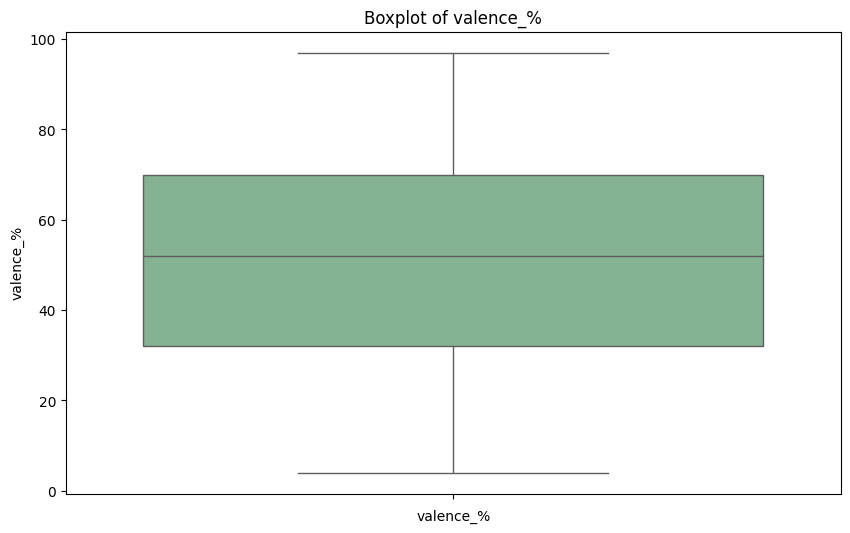

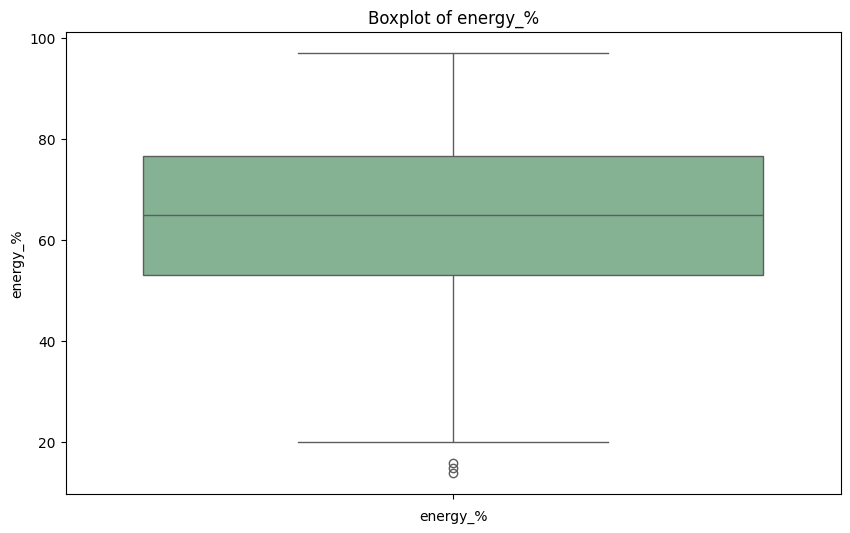

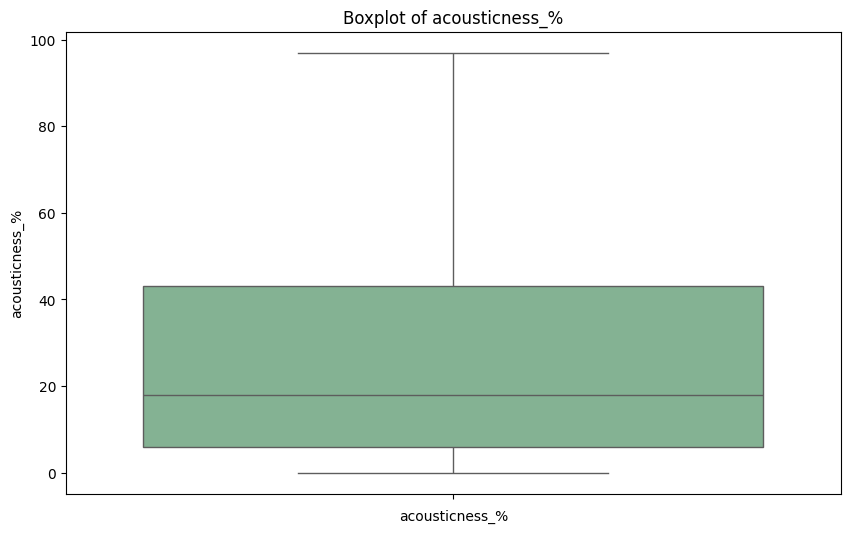

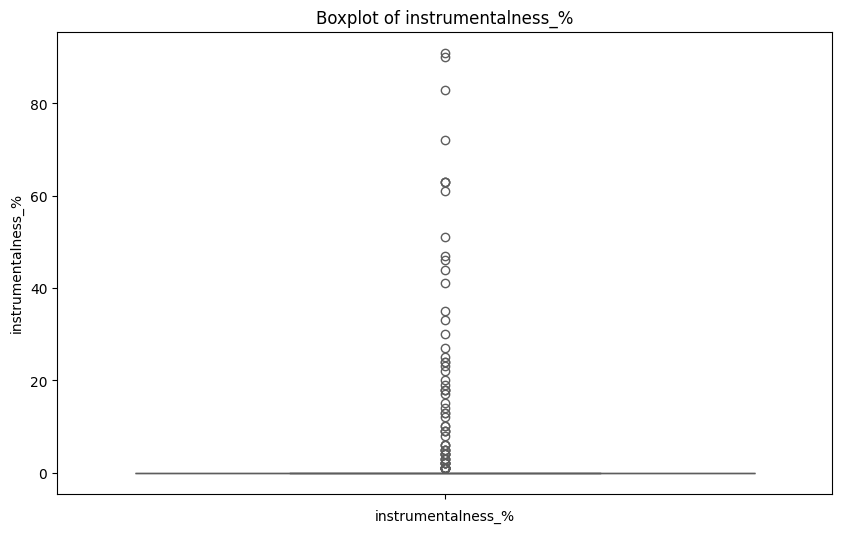

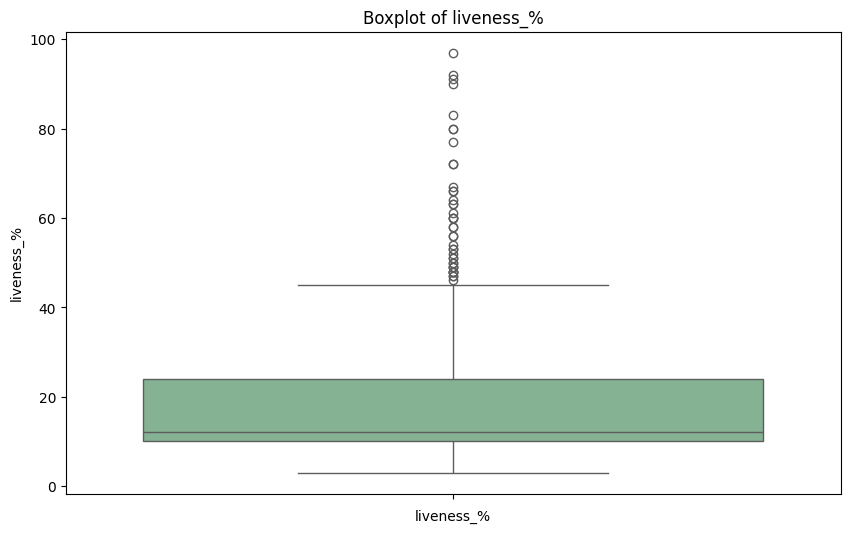

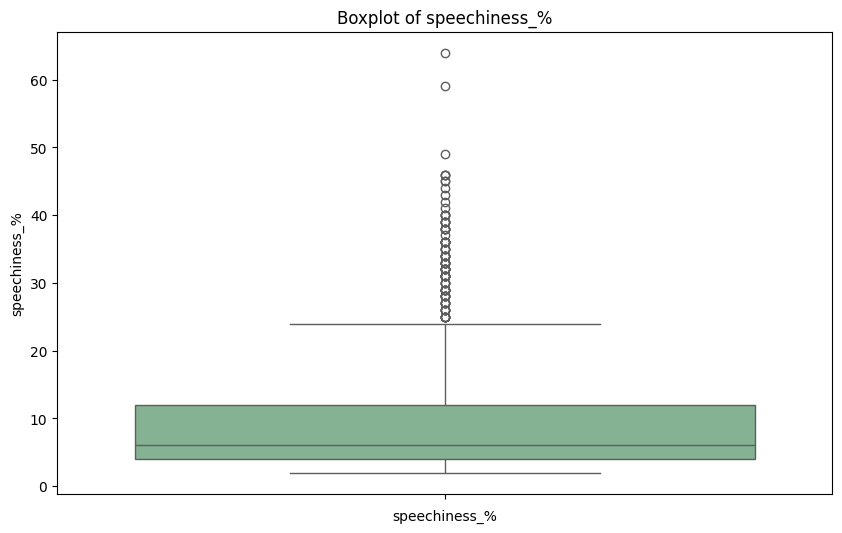

In [48]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

The shape of boxplots show how the data is distributed and it also shows any outliers. Since I did not clean the data we can see that ther are quite a few outliers for the majority of categories.

# Density

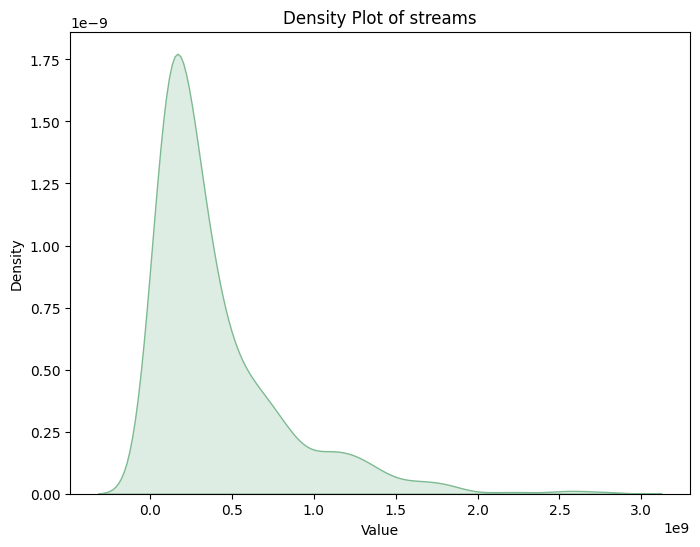

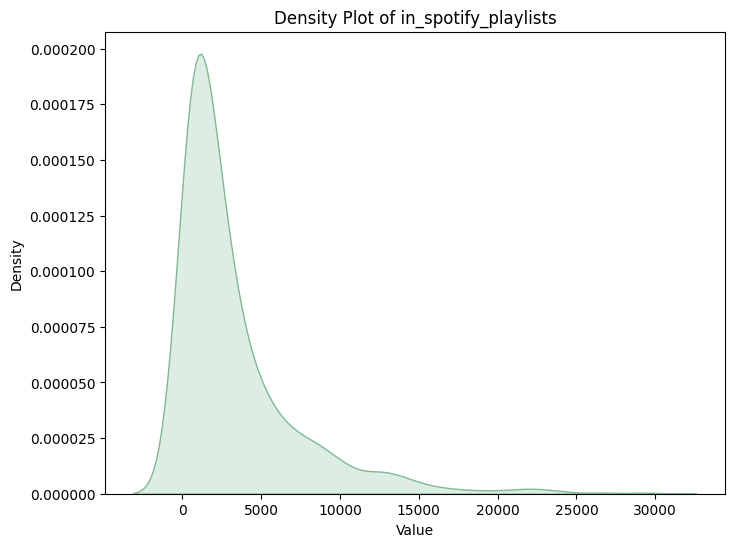

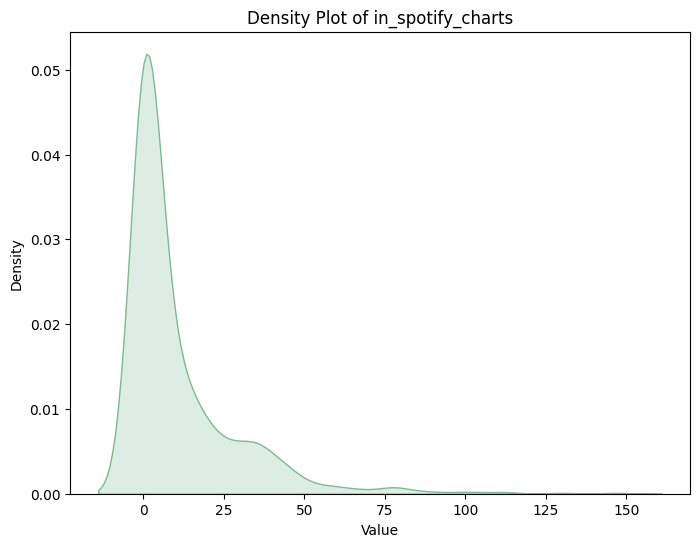

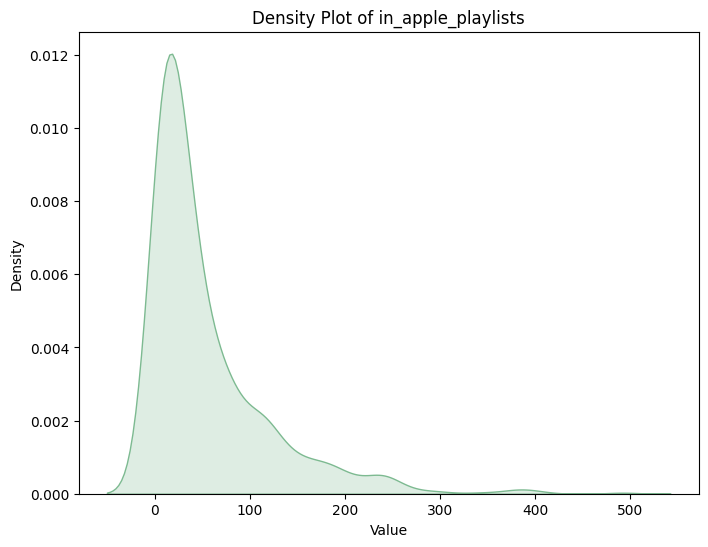

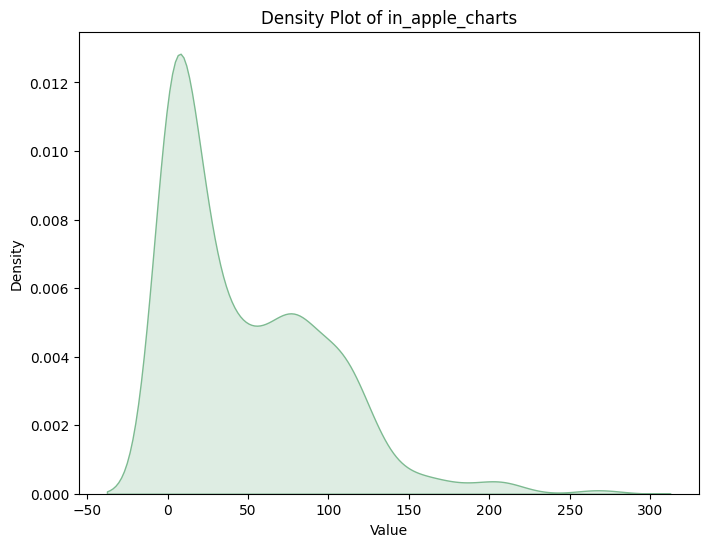

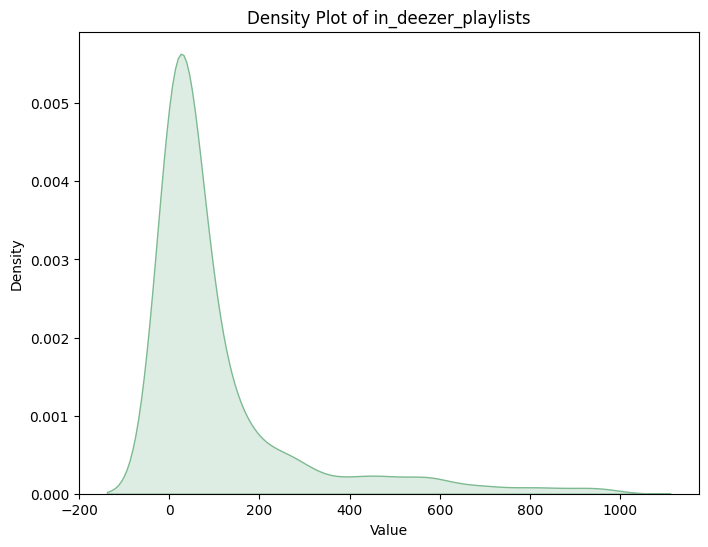

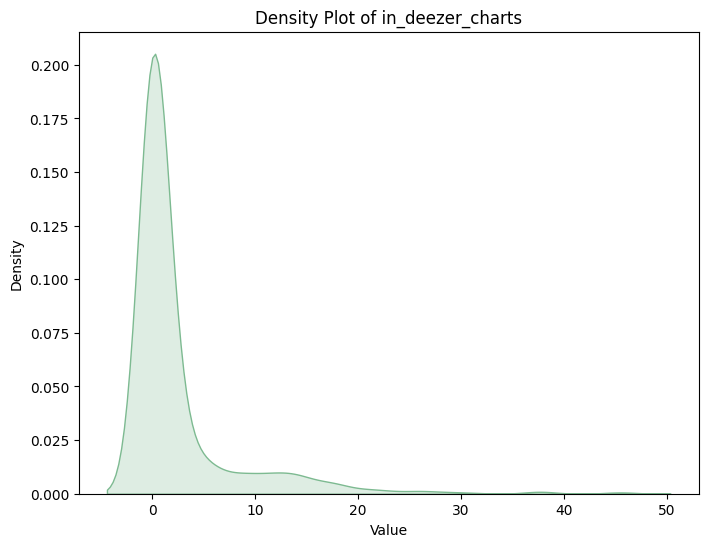

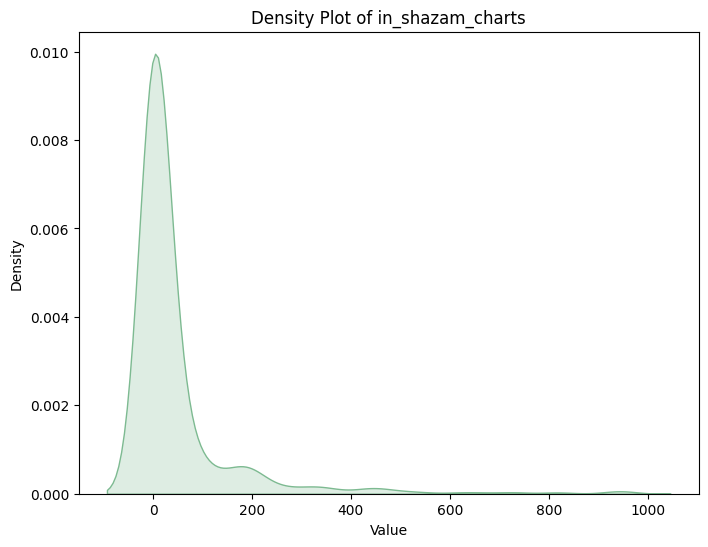

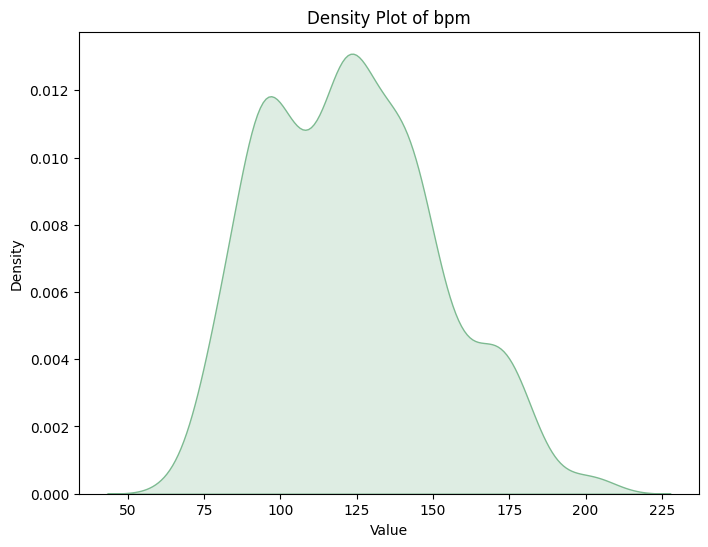

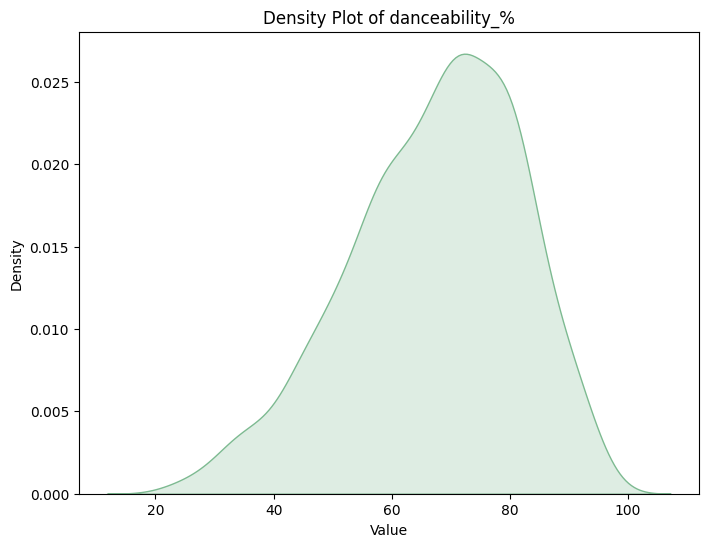

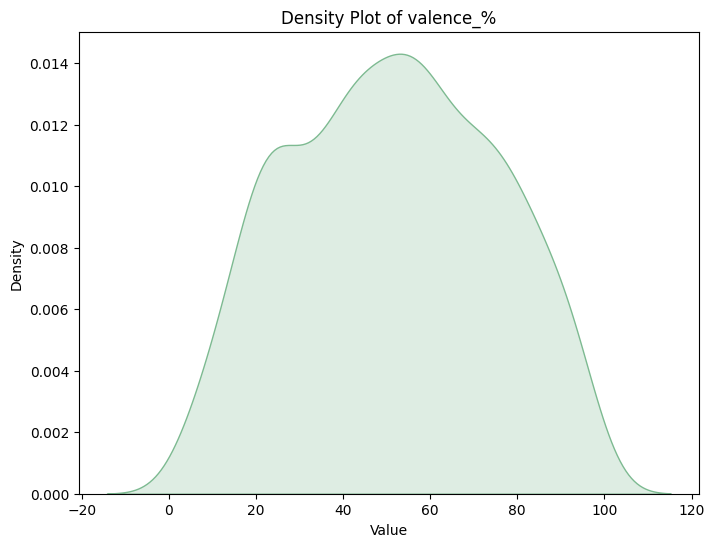

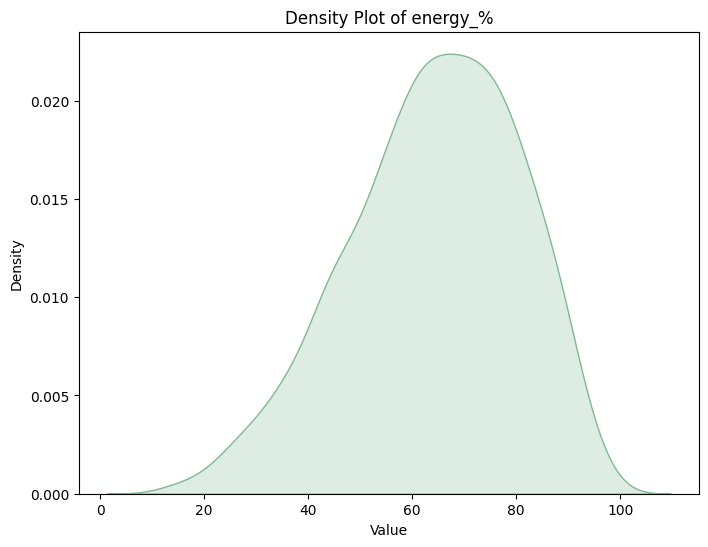

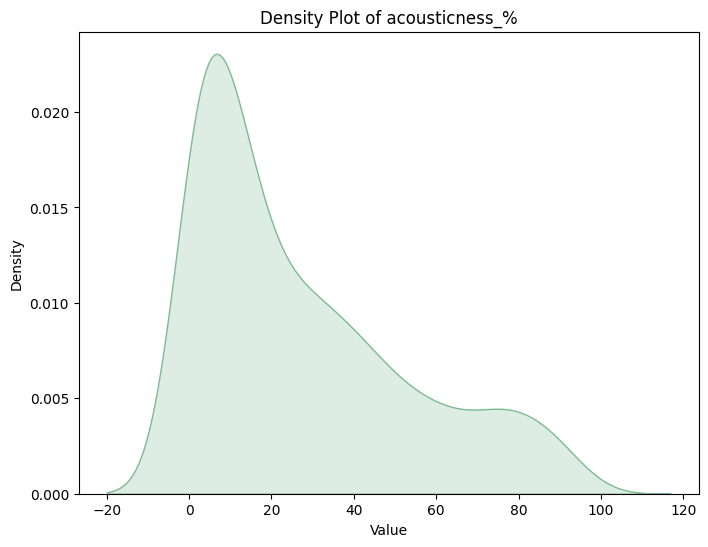

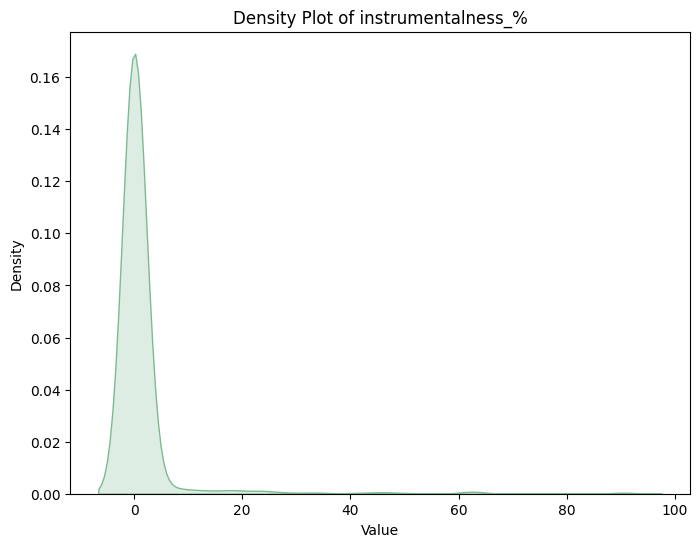

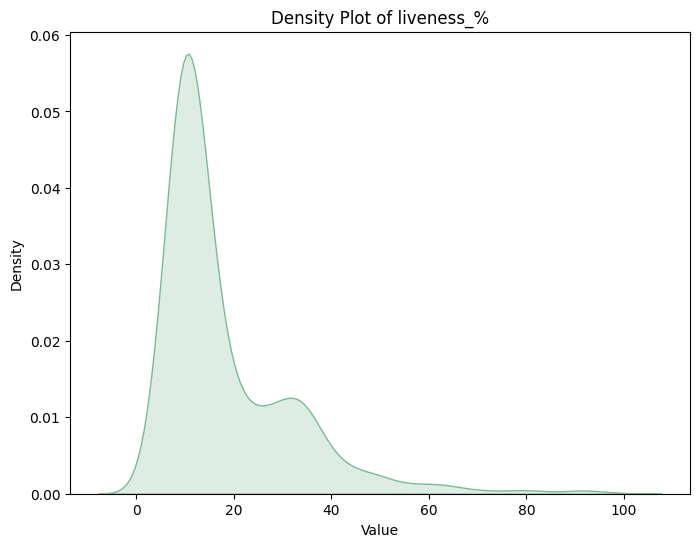

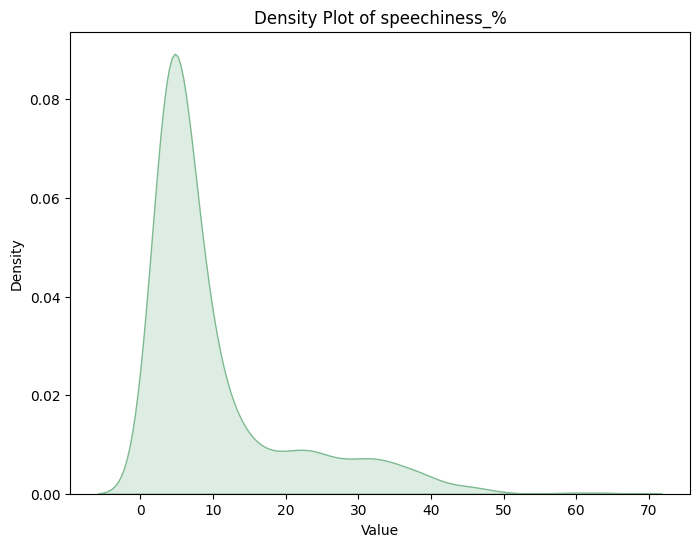

In [49]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

Density plots can be seen as extensions of the histograms. Unlike histograms,  density plos can smooth out the distribution of values and reduce noise. Density plots visualize the distribution of data over a given period, and the peaks show where values are concentrated. Here we have 16 density plots that range from being about one category to comparing two categories together.